In [0]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

batch_size = 64
epochs = 50
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 10

X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

print(np.max(X_train))
train_X,valid_X,train_ground,valid_ground = train_test_split(X_train,
                                                             X_train,
                                                             test_size=0.2,
                                                             random_state=13)

input_img = Input(shape = (784,))
num_classes = 10

def Encoder_part(input_img):

    encoded = Dense(units=256, activation='relu')(input_img)
    encoded = Dense(units=128, activation='relu')(encoded)
    encoded = Dense(units=64, activation='relu')(encoded)
    encoded = Dense(units=32, activation='relu')(encoded)

    return encoded

def Decoder_part(encoded):
        
    decoded = Dense(units=64, activation='relu')(encoded)
    decoded = Dense(units=128, activation='relu')(decoded)
    decoded = Dense(units=256, activation='relu')(decoded)
    decoded = Dense(units=784, activation='relu')(decoded)
    
    return decoded

In [0]:
autoencoder1=Model(input_img, Decoder_part(Encoder_part(input_img)))
autoencoder2=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder3=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder4=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder5=Model(input_img, Decoder_part(Encoder_part(input_img)))
autoencoder_final=Model(input_img, Decoder_part(Encoder_part(input_img)))

In [0]:
#encoder = Model(input_img, Encoder_part(input_img))

autoencoder1.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder2.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder3.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder4.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder5.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder_final.compile(loss='mean_squared_error', optimizer = SGD())

autoencoder1.summary()
autoencoder2.summary()
#autoencoder3.summary()
#autoencoder4.summary()
#autoencoder5.summary()
autoencoder_final.summary()



In [0]:
#print(train_X[1][1])
#print(np.shape(train_X))
batch_train_X = []
batch_train_ground = []

i=0
while i < 48000:
  x  = []
  j = 0
  while j<1000:
    x.append(train_X[i])
    j = j+1
    i = i+1
  print(i)
  batch_train_X.append(x)
print("done")

In [0]:
#print(np.shape(train_X))
print(np.shape(batch_train_ground))

In [0]:
i=0
while i < 48000:
  x  = []
  j = 0
  while j<1000:
    x.append(train_ground[i])
    j = j+1
    i = i+1
  print(i)
  batch_train_ground.append(x)
print("done")

In [0]:
print(batch_train_X[47][999])

In [0]:
valid_X = valid_X[:1000]
valid_ground = valid_ground[:1000]


In [0]:
print(np.shape(train_X))
print(np.shape(i))

In [7]:
count = 0
number = 0
for epo in range (0,50):
  number = 0
  print("entered first loop : ", epo)
  for i,j in zip(batch_train_X,batch_train_ground):
    print("entered second loop : ")
    number = number + 1
    i = [i]
    j = [j]
    print("**************************************************************************************************************8")
    print("batch : " , number, "epoch : ", epo)
    if count == 0:
      print("Entered if 1", count)
      autoencoder_train1 = autoencoder1.fit(i,j, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
      count = count+1
    if count == 1:
      print("Entered if 2", count)
      autoencoder_train2 = autoencoder2.fit(i,j, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
      count = count+1
    #if count == 2:  
    #  autoencoder_train3 = autoencoder3.fit(i,j, batch_size=1,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
    #if count == 3:  
    #  autoencoder_train4 = autoencoder4.fit(i,j, batch_size=1,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
    #if count ==4:  
    #  autoencoder_train5 = autoencoder5.fit(i,j, batch_size=1,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
    if count ==2:
      print("Entered if 3", count)
      count = 0
      w1 = np.array(autoencoder1.get_weights())
      w2 = np.array(autoencoder2.get_weights())
      #w3 = autoencoder3.get_weights()
      #w4 = autoencoder4.get_weights()
      #w5 = autoencoder5.get_weights()
      w_final = (w1+w2)/2
      
      print("Taken weights")
      
      w_cur = np.array(autoencoder_final.get_weights())
      w_final = (w_cur+w_final)/2

      
    
      print("Meaned weights")
    
      
    
      autoencoder_final.set_weights(w_final)
      autoencoder1.set_weights(w_final)
      autoencoder2.set_weights(w_final)
      #autoencoder3.set_weights(w_final)
      #autoencoder4.set_weights(w_final)
      #autoencoder5.set_weights(w_final)
      #autoencoder.set_weights(w_final)
      
      print("Going to the top again")



Entered if 3 2
Taken weights
Meaned weights
Going to the top again
entered second loop : 
**************************************************************************************************************8
batch :  15 epoch :  49
Entered if 1 0
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 20us/step - loss: 0.1110 - val_loss: 0.1114
Entered if 2 1
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 17us/step - loss: 0.1110 - val_loss: 0.1114
Entered if 3 2
Taken weights
Meaned weights
Going to the top again
entered second loop : 
**************************************************************************************************************8
batch :  16 epoch :  49
Entered if 1 0
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 16us/step - loss: 0.1107 - val_loss: 0.1114
Entered if 2 1
Train on 1000 samples, validate on 100

In [0]:
loss = autoencoder_train1.history['loss']
val_loss = autoencoder1.history['val_loss']
epochs = range(75)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss - AE1')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

'''
loss = autoencoder_train2.history['loss']
val_loss = autoencoder_train2.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
weight'''

In [9]:
wt_fn = autoencoder_final.get_weights()
print("Weights taken")
print(np.shape(wt_fn[0]))

Weights taken
(784, 256)


In [10]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
train_X,valid_X,y_train,y_valid = train_test_split(X_train,train_Y_one_hot,test_size=0.2,random_state=13)

In [0]:
def fc(enco):
    flat = enco
    den = Dense(64, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [0]:
full_model = Model(input_img,fc(Encoder_part(input_img)))

In [0]:
for l1,l2 in zip(full_model.layers[:6],autoencoder_final.layers[0:6]):
    l1.set_weights(l2.get_weights())

In [0]:
for layer in full_model.layers[0:6]:
    layer.trainable = False
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [20]:
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total para

In [0]:
for layer in full_model.layers[0:6]:
    layer.trainable = False

In [22]:
classify_train = full_model.fit(train_X, y_train, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))

W0710 07:28:24.440741 139751531292544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 71us/step - loss: 2.2883 - acc: 0.1894 - val_loss: 2.2745 - val_acc: 0.2433
Epoch 2/100
48000/48000 [==============================] - 3s 69us/step - loss: 2.2616 - acc: 0.2506 - val_loss: 2.2492 - val_acc: 0.2672
Epoch 3/100
48000/48000 [==============================] - 3s 69us/step - loss: 2.2368 - acc: 0.2655 - val_loss: 2.2250 - val_acc: 0.2845
Epoch 4/100
48000/48000 [==============================] - 3s 69us/step - loss: 2.2133 - acc: 0.2892 - val_loss: 2.2023 - val_acc: 0.2913
Epoch 5/100
48000/48000 [==============================] - 3s 69us/step - loss: 2.1909 - acc: 0.2970 - val_loss: 2.1805 - val_acc: 0.3098
Epoch 6/100
48000/48000 [==============================] - 3s 69us/step - loss: 2.1697 - acc: 0.3066 - val_loss: 2.1597 - val_acc: 0.3304
Epoch 7/100
48000/48000 [==============================] - 3s 69us/step - loss: 2.1497 - acc: 0.3279 - val_loss: 2.1401 - 

In [0]:
full_model.save_weights('classification_complete.h5')


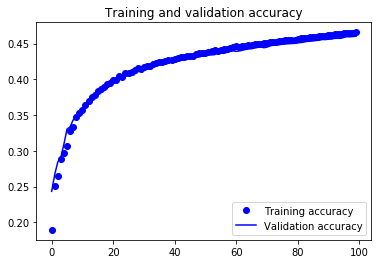

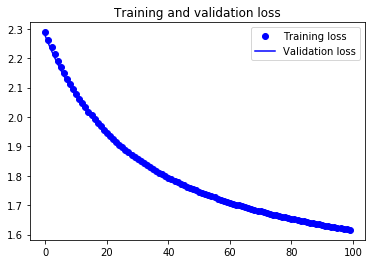

In [24]:
accuracy = classify_train.history['acc']
val_accuracy = classify_train.history['val_acc']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
test_eval = full_model.evaluate(X_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.5983738933563232
Test accuracy: 0.4737
